# Demonstration

In [1]:
import os
from options.test_options import TestOptions
from data import create_dataset
from models import create_model
import matplotlib.pyplot as plt
from util import util

dataset [UnalignedDataset] was created
initialize network with normal
initialize network with normal
model [CycleGANModel] was created
loading the model from ./checkpoints/vangogh_cycleGAN/latest_net_G_A.pth
loading the model from ./checkpoints/vangogh_cycleGAN/latest_net_G_B.pth
---------- Networks initialized -------------
[Network G_A] Total number of parameters : 11.378 M
[Network G_B] Total number of parameters : 11.378 M
-----------------------------------------------


No handles with labels found to put in legend.


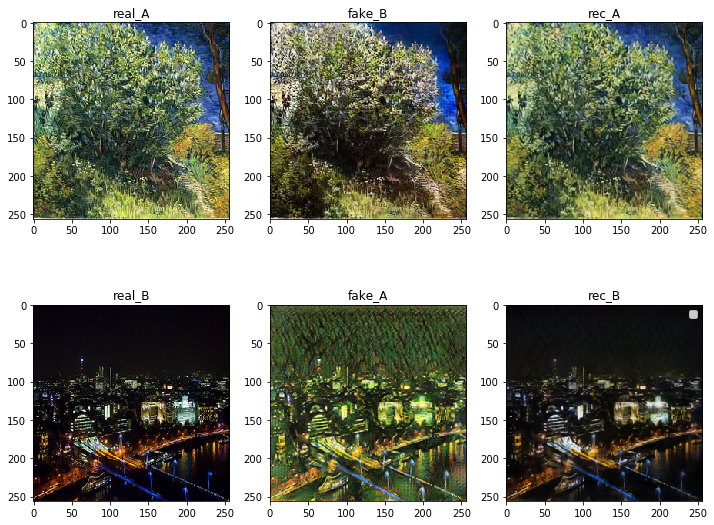

No handles with labels found to put in legend.


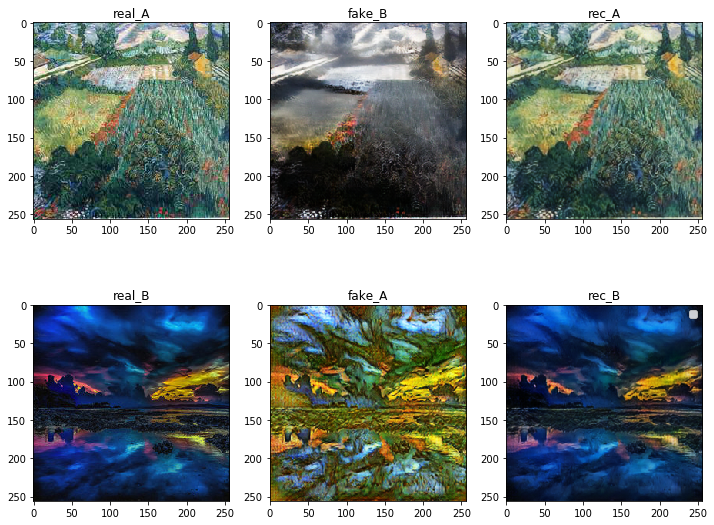

No handles with labels found to put in legend.


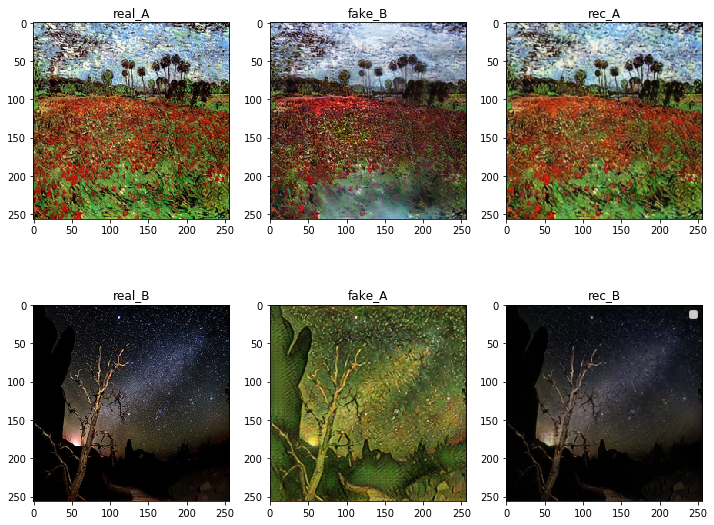

No handles with labels found to put in legend.


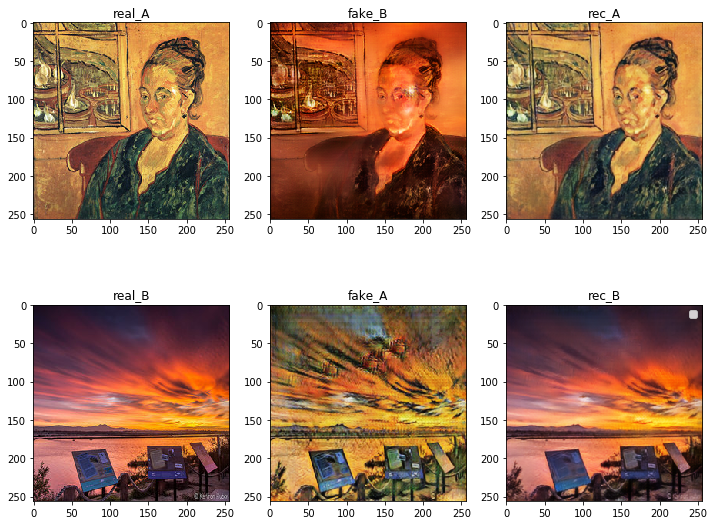

No handles with labels found to put in legend.


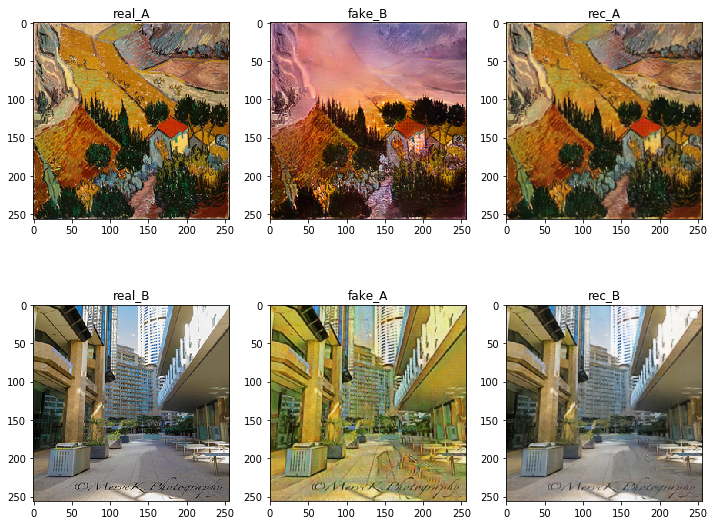

In [2]:
opt = TestOptions().parse()

opt.name = 'vangogh_cycleGAN'
opt.dataroot = './datasets/vangogh2photo'

opt.num_threads = 0
opt.batch_size = 1
opt.no_flip = True
opt.display_id = -1
dataset = create_dataset(opt)
model = create_model(opt)
model.setup(opt)


if opt.eval:
    model.eval()
for i, data in enumerate(dataset):
    if i >= opt.num_test:
        break
    model.set_input(data)
    model.test()
    visuals = model.get_current_visuals()
    count = 0
    fig, axes = plt.subplots(2,3,figsize = (10,8))
    for label, im_data in visuals.items():
        im = util.tensor2im(im_data)
        axes[int(count/3)][count%3].imshow(im)
        axes[int(count/3)][count%3].set_title(label)
        count += 1
    plt.legend()
    plt.tight_layout()
    plt.show()